# TP 4- Valeurs propres
## Analyse Numérique Matricielle
### Polytech SU, 2023-2024


In [12]:
import numpy as np
from scipy.linalg import hilbert
import matplotlib.pyplot as plt


On rappelle l'algorithme de recherche de la plus grande  valeur propre de $A\in M_n(\mathbb{C})$. On pose $x_0\in\mathbb{C}^n$ puis
$$x_{k+1}=\frac{Ax_k}{\Vert A x_{k}\Vert_2}.$$
Quand on arrête le processus à $k_0$, on pose alors $x_1=\frac{x_{k_0}}{\Vert x_{k_0}\Vert_2}$ et 
$$\lambda_1=\frac{\langle Ax_{k_0},x_{k_0}\rangle}{\Vert x_{k_0}\Vert_2^2}.$$


### Exercice 1: 


On considère la matrice
$$A=\begin{pmatrix}
2&-1&0& 0&\ldots&0\\
-1&2&-1 &0&\ddots&\vdots\\
0&\ddots&\ddots&\ddots&\ddots&0\\
0&\ddots&\ddots&\ddots&\ddots&0\\
\vdots&\ddots&0&-1 &2&-1\\
0&\dots&0&0&-1&2
\end{pmatrix}.$$

1. Construire une fonction dépendant de $n$ pour construire la matrice $A\in M_n(\mathbb{R})$.

In [13]:
def create_matrix(n):
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2
        if i > 0:
            A[i, i - 1] = -1
            A[i - 1, i] = -1
    return A

n=5
A = create_matrix(n)
print(A)

[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


2. On choisit $n=10$. Utiliser la commande `eig` pour trouver une approximation des valeurs propres $\lambda_1>\dots>\lambda_n$ de la matrice $A$. Recopier $\lambda_1$ et $\lambda_n$.

In [14]:
n = 10
A = create_matrix(n)
eigenvalues, eigenvectors = np.linalg.eig(A)
lambda_1 = max(eigenvalues)
lambda_n = min(eigenvalues)
print(lambda_1)
print(lambda_n)
print(eigenvalues)


3.9189859472289967
0.08101405277100575
[3.91898595 3.68250707 3.30972147 2.83083003 2.28462968 1.71537032
 0.08101405 0.31749293 0.69027853 1.16916997]


3. On choisit $w=(1,\dots,n)^T\in \mathbb{R}^n$ et $x^{(0)}=\frac{w}{\Vert w\Vert}$. Implémenter la méthode de la puissance pour le calcul de la plus grande valeur propre (en valeur absolue) de la matrice $A$. Recopier la valeur propre trouvée, ainsi que le nombre d'itérations nécessaire pour satisfaire la tolérance $tol=10^{-6}$ dans le critère d'arrêt de la méthode.

In [15]:
def power_method(A, x0, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        Ax = np.dot(A, x)
        xnew = Ax / np.linalg.norm(x)
        if np.linalg.norm(xnew -   x) < tol:
            break
        x=xnew
    lambda_max = np.dot(x, A @ x)/np.linalg.norm(x)**2
    return lambda_max, i + 1

w = np.ones(n)
x0 = w / np.linalg.norm(w)
lambda_max, iterations = power_method(A, x0)
print(f"\nMéthode de la puissance pour lambda_max : {lambda_max}")
print(f"Iterations nécessaires : {iterations}")



Méthode de la puissance pour lambda_max : 3.6825070656612526
Iterations nécessaires : 56


4. Reprendre la question précédente en prenant $w=(\sin(2j\pi/(n+1)))_{1\leq j\leq n}$ et $x^{(0)}=\frac{w}{\Vert w\Vert}$. Que remarquez vous ?

In [16]:
w_sin = np.sin(2 * np.pi * np.arange(1, n + 1) / (n + 1))
x0_sin = w_sin / np.linalg.norm(w_sin)
lambda_max_sin, iterations_sin = power_method(A, x0_sin)
print(f"\nMéthode de la puissance pour lambda_max avec w_sin : {lambda_max_sin}")
print(f"Iterations nécessaires avec w_sin : {iterations_sin}")




Méthode de la puissance pour lambda_max avec w_sin : 0.3174929343376377
Iterations nécessaires avec w_sin : 2
[ 0.54064082  0.909632    0.98982144  0.75574957  0.28173256 -0.28173256
 -0.75574957 -0.98982144 -0.909632   -0.54064082]


5. Pour  $w=(1,\dots,n)^T\in \mathbb{R}^n$ et $x^{(0)}=\frac{w}{\Vert w\Vert}$ et $n=5,10,\ldots,100$, calculer le nombre d'itération nécessaires pour atteindre $tol=10^{-6}$. Afficher ce nombre en fonction de $n$ et le comparer à $\vert\lambda_1/\lambda_2\vert$.

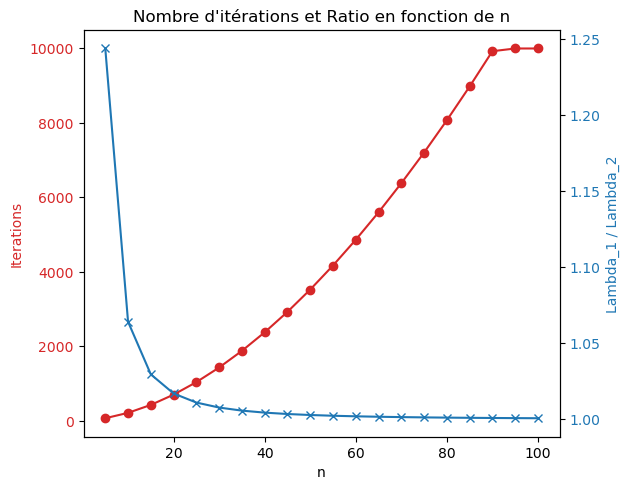

In [7]:
n_values = np.arange(5, 101, 5)
iterations_list = []
ratio_eigen=[]

for n in n_values:
    A_n = create_matrix(n)
    w_n = np.arange(1,n+1)
    x0_n = w_n / np.linalg.norm(w_n)
    _, iterations_n = power_method(A_n, x0_n,max_iter=10000)
    iterations_list.append(iterations_n)
    eigenvalues, eigenvectors = np.linalg.eig(A_n)
    eigen=sorted(eigenvalues,reverse=True)
    lambda_1=eigen[0]
    lambda_2 = eigen[1]
    ratio_eigen.append(lambda_1/lambda_2)

# Tracé du graphique
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n')
ax1.set_ylabel('Iterations', color=color)
ax1.plot(n_values, iterations_list, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Lambda_1 / Lambda_2', color=color)
ax2.plot(n_values, ratio_eigen, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Nombre d\'itérations et Ratio en fonction de n')
plt.show()

6. On s'intéresse au calcul de la plus petite valeur propre $\lambda_n$ de $A$. Comme $\lambda_n^{-1}$ est alors la plus grande valeur propre de $A^{-1}$, on introduit la méthode itérative suivante :
$$\left\lbrace\begin{aligned} x_0&\in \mathbb{R}^n\\
  A\tilde{x}_{k+1}&=x_k\\
  x_{k+1}&=\frac{\tilde{x}_{k+1}}{\Vert \tilde{x}_{k+1}\Vert}
  \end{aligned}\right..$$

Pourquoi cet algorithme doit permettre de trouver $\lambda_n$ ? Reprendre la question 3. pour calculer $\lambda_n$ en implémentant l'algorithme précédent.

In [8]:
def inverse_power_method(A, x0, tol=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        Ainvx = np.linalg.solve(A, x)
        x_new = Ainvx / np.linalg.norm(x)
        if np.linalg.norm(x_new -x) < tol:
            break
        x=x_new
    Ainvx= np.linalg.solve(A, x)
    lambda_maxinv = np.dot(x,Ainvx)/np.linalg.norm(x)**2
    lambda_min=1/lambda_maxinv
    return lambda_min, i + 1

lambda_min, iterations_min = inverse_power_method(A, x0)
print(f"\nMéthode itérative pour lambda_min : {lambda_min}")
print(f"Iterations nécessaires : {iterations_min}")
eigenvalues,_ =np.linalg.eig(A)
print(f"Plus petite valeur propre : {min(eigenvalues)}")



Méthode itérative pour lambda_min : 0.08101405277100522
Iterations nécessaires : 9
Plus petite valeur propre : 0.08101405277100575


7. Ecrire un code permettant d'obtenir une matrice $\tilde{A}$, de taille $n$, telle que $\tilde{a}_{ij}=\frac{1/2}{n-i-j+3/2}$. 

In [19]:
def custom_matrix(n):
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i, j] = (1/2) / (n - i - j + 3/2)
    return matrix



(array([ 8.53076089e-01,  9.45334794e-03,  2.60867960e-05, -1.51906662e+00,
        1.56910987e+00,  1.57079559e+00,  1.57079633e+00, -1.57075616e+00,
       -1.57079632e+00, -1.57079633e+00]), array([[ 2.74136680e-01,  7.35518596e-01, -6.02989879e-01,
         1.36151156e-01, -4.03138894e-02, -2.17933592e-03,
         7.03067022e-05, -9.86899830e-03, -4.27811492e-04,
        -8.33701955e-06],
       [ 3.51982807e-01,  4.64643416e-01,  7.80028308e-01,
         2.07617558e-01, -8.67441620e-02, -1.05346593e-02,
         6.92154911e-04, -3.19432594e-02, -2.99919749e-03,
        -1.11905032e-04],
       [ 5.92596073e-01, -4.68415292e-01, -1.65456378e-01,
         4.89215792e-01, -3.35516878e-01, -9.79903442e-02,
         1.29831313e-02, -1.96807308e-01, -4.03193557e-02,
        -2.84465611e-03],
       [ 3.53818119e-01, -1.29613839e-01, -2.29259839e-02,
         3.87800092e-02,  3.47582398e-01,  5.23037637e-01,
        -1.71146420e-01,  5.52181428e-01,  3.52927053e-01,
         5.33730047e

8.Reprendre les questions 3, 5 et 6 avec cette matrice.
Pourquoi le nombre d'itérations est-il plus élevé ? (Comparer par exemple les valeurs propres de cette matrice par rapport à celle de la question 3.).


Méthode de la puissance pour lambda_max : 1.0372923569170396
Iterations nécessaires : 1000


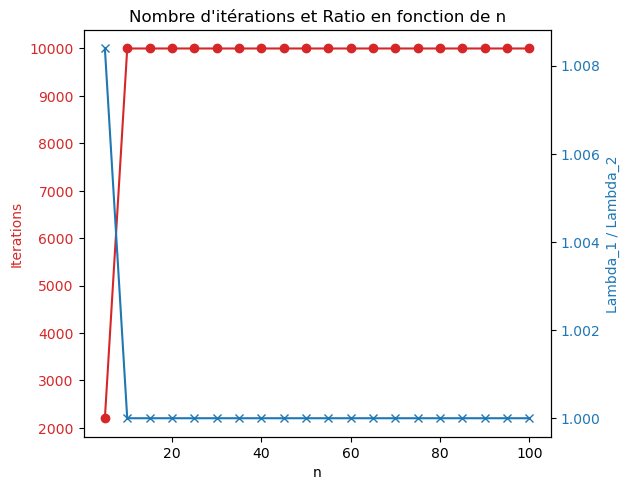


Méthode itérative pour lambda_min : 2.60867959974899e-05
Iterations nécessaires : 6
Plus petite valeur propre : 2.608679599760921e-05


In [17]:
## Question 3.
n=10
Atilde=custom_matrix(n)
w = np.ones(n)
x0 = w / np.linalg.norm(w)
lambda_max, iterations = power_method(Atilde, x0)
print(f"\nMéthode de la puissance pour lambda_max : {lambda_max}")
print(f"Iterations nécessaires : {iterations}")



#### question 5
n_values = np.arange(5, 101, 5)
iterations_list = []
ratio_eigen=[]

for n in n_values:
    A_n = custom_matrix(n)
    w_n = np.arange(1,n+1)
    x0_n = w_n / np.linalg.norm(w_n)
    _, iterations_n = power_method(A_n, x0_n,max_iter=10000)
    iterations_list.append(iterations_n)
    eigenvalues, eigenvectors = np.linalg.eig(A_n)
    eigen=sorted(abs(eigenvalues),reverse=True)
    lambda_1=eigen[0]
    lambda_2 = eigen[1]
    ratio_eigen.append(lambda_1/lambda_2)

# Tracé du graphique
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n')
ax1.set_ylabel('Iterations', color=color)
ax1.plot(n_values, iterations_list, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Lambda_1 / Lambda_2', color=color)
ax2.plot(n_values, ratio_eigen, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Nombre d\'itérations et Ratio en fonction de n')
plt.show()

#### question 6



lambda_min, iterations_min = inverse_power_method(Atilde, x0)
print(f"\nMéthode itérative pour lambda_min : {lambda_min}")
print(f"Iterations nécessaires : {iterations_min}")
eigenvalues,_ =np.linalg.eig(Atilde)
print(f"Plus petite valeur propre : {min(abs(eigenvalues))}")
